# Wine Quality Dataset

The goal is to build a model that can accurately predict the quality of wine based on the characteristics of the wine like alcohol level, pH, citric acid and others.
I have decided to focus on predicting the wine quality because the recommendation of wine is 100% dependent on the quality of the wine.

1. import the libraries that would be used for data exploration


 - pandas for data wrangling
 - matplotlib and seaborn for visualizations 
 - confusion matrix and accuracy score to see how well the model has performed
 - functions notebook to perform the different data set splits

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [51]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
%run functions.ipynb 

2. Read the dataset into a pandas dataframe and print out the first 10 rows of the dataframe

In [3]:
current_dir = os.path.abspath(os.getcwd())

dataset_path = os.path.join(current_dir, '..', 'datasets', 'winequality.csv')

In [4]:
wine = pd.read_csv(dataset_path)
wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,recommend
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,False
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,False
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,False
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,False
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,False
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,False
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6,False
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,False
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,False
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6,False


3. Data exploration;

 - used shape method to see how many rows and columns are in the dataframe
 - used the describe function to show the statistical explanation of the dataset
 - info function to see the datatypes of each feature in the dataset
 - columns method to print out all the column titles

In [5]:
wine.shape

(4898, 13)

In [6]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


- The average alcohol content is 10.514267 and the average wine quality is 5.877909

In [7]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 13 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
recommend               4898 non-null bool
dtypes: bool(1), float64(11), int64(1)
memory usage: 464.0 KB


- all the columns except recommend contain numeric datatype; recommend contains boolean datatype which I would be converting to object dtype to be able to perform some exploratory analysis on the dataset

In [8]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'recommend'],
      dtype='object')

- to check if there are any missing values in the dataset

In [9]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
recommend               0
dtype: int64

- Converting the recommend column from boolean dtype to object dtype

In [10]:
bools = wine.select_dtypes(include=[bool])
booleanDictionary = {True: 'TRUE', False: 'FALSE'}

for column in bools:
    wine[column] = wine[column].map(booleanDictionary)

In [11]:
#confirm the changed datatype
wine.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
recommend                object
dtype: object

I would like to know the distribution of the dataset
- how many wines were recommended and how many were rejected
- quality of wines available in the dataset

I will use a correlogram to visualize the distribution of the dataset and the relationships between features

PS; I separated the dataset into two groups so that the plots and labellings would be clearer.

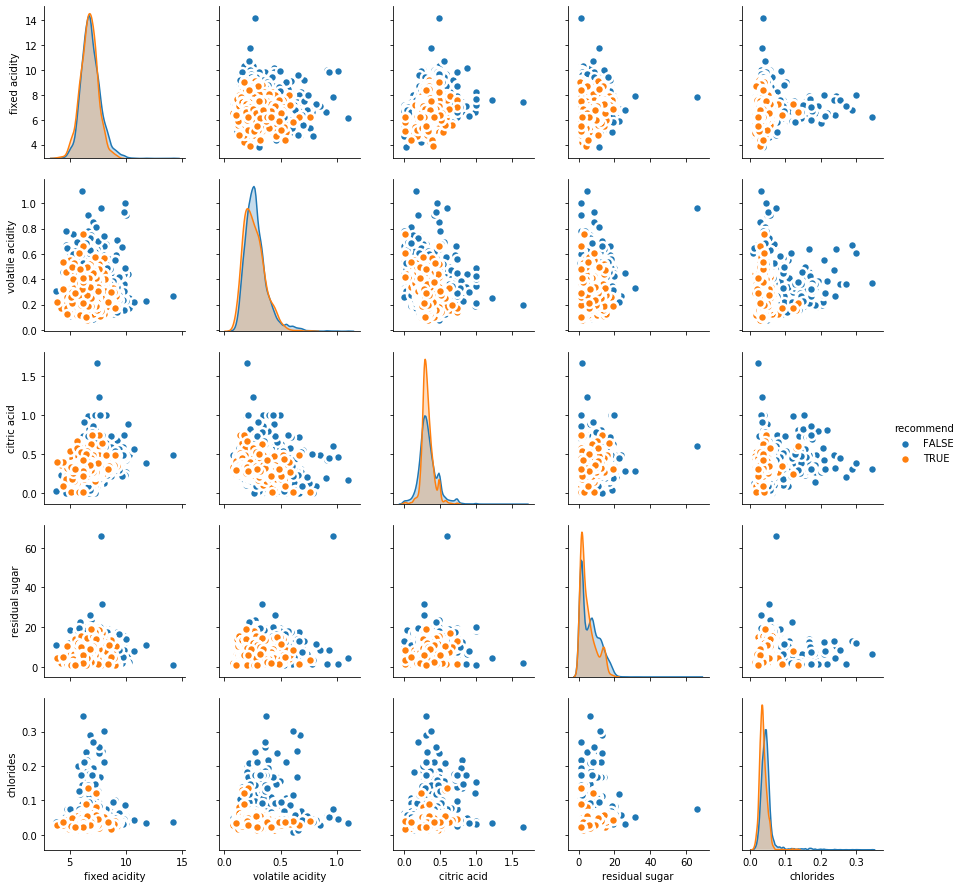

In [12]:
one_half = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'recommend']
df = wine[one_half]

sns.pairplot(df, kind="scatter", hue="recommend", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

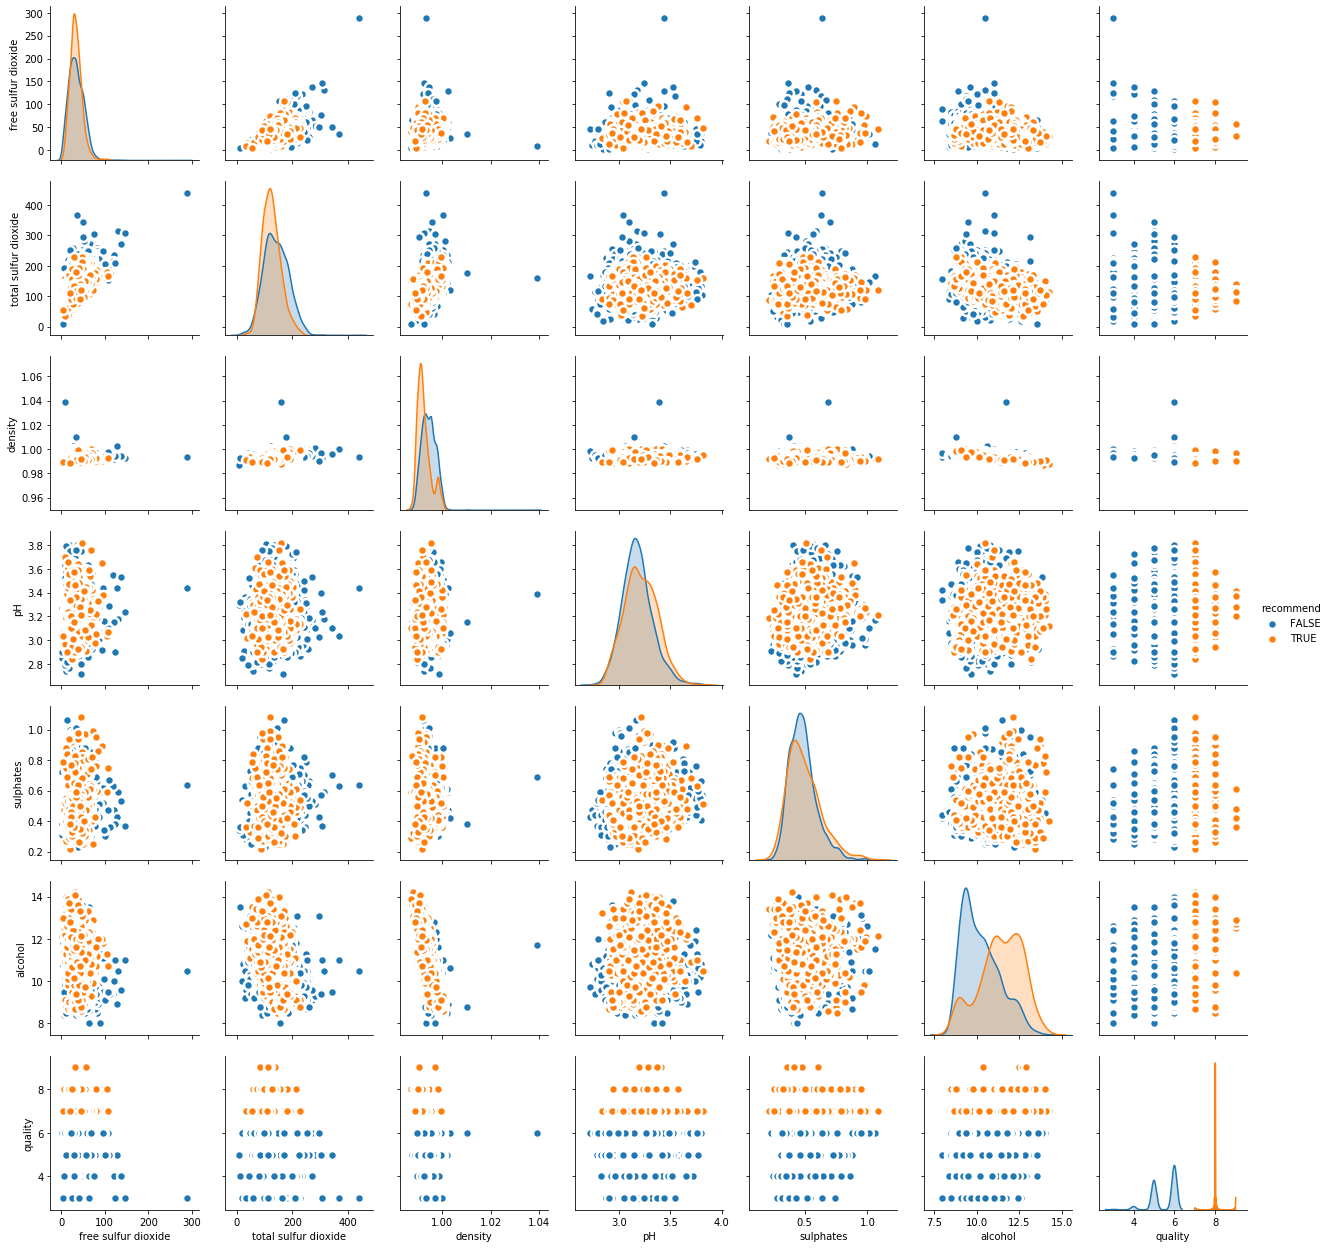

In [13]:
half_two = ['free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality', 'recommend']
df = wine[half_two]

sns.pairplot(df, kind="scatter", hue="recommend", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

- Wine with quality below 7 are rejected

In [14]:
wine['recommend'].value_counts(normalize=True)*100

FALSE    78.358514
TRUE     21.641486
Name: recommend, dtype: float64

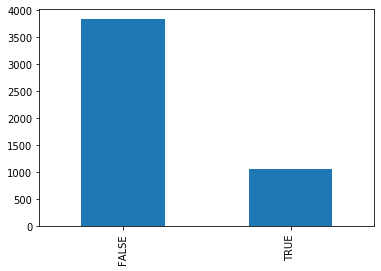

In [15]:
wine['recommend'].value_counts().plot(x =wine['recommend'], kind='bar')

The dataset is not balanced,because over 78% of the dataset is wine that was not recommended while the remaining 21% is wine that was recommended.

I want to check the correlation of the other features to wine quality because wine quality is the main determinant for wine recommendation

In [16]:
quality_corr_coeffs = wine.corr()['quality'].abs().sort_values()
quality_corr_coeffs

free sulfur dioxide     0.008158
citric acid             0.009209
sulphates               0.053678
residual sugar          0.097577
pH                      0.099427
fixed acidity           0.113663
total sulfur dioxide    0.174737
volatile acidity        0.194723
chlorides               0.209934
density                 0.307123
alcohol                 0.435575
quality                 1.000000
Name: quality, dtype: float64

# Model Training

I will be using stratified shuffle split to split my dataset because the dataset is not balanced.

I am going to use different proportions of the train/test set to see how the proportion might affect the model performance, I have created three functions in a separate notebook (functions.ipynb) that would split the dataset into the specified proportion and perform crossvalidation on the train set to see the performance of the model on the train set before using it on my test set, the model with the highest accuracy with cross validation would be the final model to be used. the functions are;

- split_80_20 - splits dataset into 80% train and 20% test
- split_75_25 - splits dataset into 75% train and 25% test
- split_70_30 - splits dataset into 70% train and 30% test


<b>Features</b>
- fixed acidity           
- volatile acidity        
- citric acid             
- residual sugar          
- chlorides               
- free sulfur dioxide     
- total sulfur dioxide    
- density                 
- pH                      
- sulphates               
- alcohol                                

<b>Target</b>
- quality

I will drop the recommend column from my model features because it is might cause bias in prediction

In [17]:
wine_m = wine.drop(['recommend'], axis = 1)

# SVC

In [18]:
split_80_20(wine_m, 'quality', svc)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gam

Acuracy is:  0.5666156202143952


In [19]:
split_75_25(wine_m, 'quality', svc)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gam

Acuracy is:  0.557037843724476


In [20]:
split_70_30(wine_m, 'quality', svc)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gam

Acuracy is:  0.5478413068844807


# KNN

In [21]:
split_80_20(wine_m, 'quality', knn)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


Acuracy is:  0.46886166411434405


In [22]:
split_75_25(wine_m, 'quality', knn)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


Acuracy is:  0.46474271712496595


In [23]:
split_70_30(wine_m, 'quality', knn)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


Acuracy is:  0.4679113185530922


# Decison Tree

In [24]:
split_80_20(wine_m, 'quality', tree)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


Acuracy is:  0.5946911689637571


In [25]:
split_75_25(wine_m, 'quality', tree)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


Acuracy is:  0.5758235774571195


In [26]:
split_70_30(wine_m, 'quality', tree)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


Acuracy is:  0.5746791131855309


# Random Forest

In [27]:
split_80_20(wine_m, 'quality', clf)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib

Acuracy is:  0.649055640632976


In [28]:
split_75_25(wine_m, 'quality', clf)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib

Acuracy is:  0.6436155731010074


In [29]:
split_70_30(wine_m, 'quality', clf)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib

Acuracy is:  0.6336056009334889


# Naive Bayes

In [30]:
split_80_20(wine_m, 'quality', nb)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


Acuracy is:  0.4448698315467075


In [31]:
split_75_25(wine_m, 'quality', nb)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


Acuracy is:  0.44459569833923224


In [32]:
split_70_30(wine_m, 'quality', nb)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


Acuracy is:  0.4425320886814469


# Results  and conclusions from Cross Validation of the train set

In [40]:
col = ['model','80_20', '75_25', '70_30']
svc = ['Support Vector Classifier', 56.66, 55.70, 54.78]
clf = ['Random Forest', 64.91, 64.36, 63.36]
tree = ['Decision Tree', 59.47, 57.58, 57.47]
knn = ['K Nearest Neighbors', 46.89, 46.47, 49.79]
nb = ['Naive Bayes', 44.49, 44.46, 44.25]

data = [col, svc, clf, tree, knn, nb]
column_names = data.pop(0)

In [41]:
df = pd.DataFrame(data, columns=column_names)
df

,model,80_20,75_25,70_30
0,Support Vector Classifier,56.66,55.70,54.78
1,Random Forest,64.91,64.36,63.36
2,Decision Tree,59.47,57.58,57.47
3,K Nearest Neighbors,46.89,46.47,49.79
4,Naive Bayes,44.49,44.46,44.25


- The <b>accuracy increased with an higher train set proportion</b> when using: Support Vector Classifier, Random Forest, Decision Tree, and Naive Bayes while K Nearest Neighbors had a higher accuracy with the 70/30 train/test split

- In the end, Random forest with 80/20 train/test split returned the highest accuracy of <b>64.91%</b> and I'll be using that model for Model testing

# Model Testing

Model - Random Forest

Split - 80/20 train/test split

In [53]:
split = StratifiedShuffleSplit(n_splits = 1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(wine_m, wine_m['quality']):
    train = wine_m.loc[train_index]
    test = wine_m.loc[test_index]
    
    #train set
    x = train.drop(['quality'], axis=1)
    y = train['quality']
    
    #test set
    a = test.drop(['quality'], axis=1)
    b = test['quality']

In [46]:
clf = RandomForestClassifier()

In [47]:
clf.fit(x,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [48]:
predictions = clf.predict(a)

In [49]:
test['Predict'] = predictions

In [56]:
confusion_matrix(b, predictions)

array([[  0,   0,   1,   3,   0,   0,   0],
       [  0,  10,  13,   9,   1,   0,   0],
       [  0,   4, 200,  84,   3,   0,   0],
       [  0,   1,  73, 321,  45,   0,   0],
       [  0,   0,  10,  88,  78,   0,   0],
       [  0,   0,   1,   8,   7,  19,   0],
       [  0,   0,   0,   0,   1,   0,   0]], dtype=int64)

In [54]:
accuracy_score(b, predictions)

0.6408163265306123

# Conclusion
The random forest model has 64.08% accuracy with the test set.